<a href="https://colab.research.google.com/github/lw1230578/sth/blob/master/weatherlondon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from keras.layers import LSTM
from keras.layers import Dense
from keras import models
from keras.models import Sequential
from keras.models import load_model

**upload the .csv weather data from**

https://www.meteoblue.com/en/weather/archive/export/london_united-kingdom_2643743?daterange=2019-02-15+to+2019-02-24&params=&params%5B%5D=11%3B2+m+above+gnd&utc_offset=1&aggregation=daily&temperatureunit=CELSIUS&windspeedunit=MILE_PER_HOUR

In [0]:
uploaded = files.upload()

Saving Temperature_london.csv to Temperature_london (4).csv


Load data from .csv file

In [0]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "Temperature_london.csv" with length 313 bytes


In [0]:
uploaded

{'Temperature_london.csv': b'date,Temperature daily mean,Temperature daily max,Temperature daily min\r\nFeb-15,7.02,13.13,2.01\r\nFeb-16,8.86,12.17,5.99\r\nFeb-17,9.53,13.25,6.13\r\nFeb-18,9.13,10.86,5.94\r\nFeb-19,6.68,10.09,4.59\r\nFeb-20,8.23,10.97,6.74\r\nFeb-21,9.09,14.5,6.02\r\nFeb-22,8.86,15.42,4.24\r\nFeb-23,10.64,15.98,7.38\r\nFeb-24,8.68,13.83,4.17\r\n'}

In [0]:
import io

In [0]:
df = pd.read_csv(io.StringIO(uploaded['Temperature_london.csv'].decode('utf-8')))

In [0]:
df

,date,Temperature daily mean,Temperature daily max,Temperature daily min
0,Feb-15,7.02,13.13,2.01
1,Feb-16,8.86,12.17,5.99
2,Feb-17,9.53,13.25,6.13
3,Feb-18,9.13,10.86,5.94
4,Feb-19,6.68,10.09,4.59
5,Feb-20,8.23,10.97,6.74
6,Feb-21,9.09,14.50,6.02
7,Feb-22,8.86,15.42,4.24
8,Feb-23,10.64,15.98,7.38
9,Feb-24,8.68,13.83,4.17


In [0]:
group = df.groupby('date')
temperature = group['Temperature daily mean'].mean()
print(temperature.head(10))


date
Feb-15     7.02
Feb-16     8.86
Feb-17     9.53
Feb-18     9.13
Feb-19     6.68
Feb-20     8.23
Feb-21     9.09
Feb-22     8.86
Feb-23    10.64
Feb-24     8.68
Name: Temperature daily mean, dtype: float64


In [0]:
prediction_days = 6
df_train = temperature[:len(temperature) - prediction_days]
df_test = temperature[len(temperature) - prediction_days:]

print(df_train.head())
print(df_test.head())


date
Feb-15    7.02
Feb-16    8.86
Feb-17    9.53
Feb-18    9.13
Name: Temperature daily mean, dtype: float64
date
Feb-19     6.68
Feb-20     8.23
Feb-21     9.09
Feb-22     8.86
Feb-23    10.64
Name: Temperature daily mean, dtype: float64


In [0]:
training_set = df_train.values 
training_set = np.reshape(training_set, (len(training_set),1))

print(training_set)

[[7.02]
 [8.86]
 [9.53]
 [9.13]]


In [0]:
sc = MinMaxScaler() 
training_set = sc.fit_transform(training_set) 
X_train = training_set[0 : len(training_set) -1]
y_train = training_set[1 : len(training_set)]
X_train = np.reshape(X_train, (len(X_train),1, 1)) 
print("train_set")                       
print(training_set)
print("x_train")
print(X_train)
print("y_train")
print(y_train)


train_set
[[0.        ]
 [0.73306773]
 [1.        ]
 [0.84063745]]
x_train
[[[0.        ]]

 [[0.73306773]]

 [[1.        ]]]
y_train
[[0.73306773]
 [1.        ]
 [0.84063745]]


In [0]:
network = Sequential() 

network.add(LSTM(units =4, activation ='sigmoid', input_shape =(None, 1)))    

network.add(Dense(units =1))

network.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy']) 

network.fit(X_train, y_train, epochs =3, batch_size =10)  

#network.save("model.h5")

#network = load_model("model.h5")

Epoch 1/3
3/3 [==============================] - 9s 3s/step - loss: 0.1969 - acc: 0.0000e+00
Epoch 2/3
3/3 [==============================] - 0s 4ms/step - loss: 0.1946 - acc: 0.0000e+00
Epoch 3/3
3/3 [==============================] - 0s 3ms/step - loss: 0.1923 - acc: 0.0000e+00


//Create prediction on test()

In [0]:
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1)) 
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
Tem_pre = network.predict(inputs) 
Tem_pre = sc.inverse_transform(Tem_pre)

print(Tem_pre )


[[8.038738]
 [8.100136]
 [8.132421]
 [8.12391 ]
 [8.187497]
 [8.117187]]


//Draw the graph

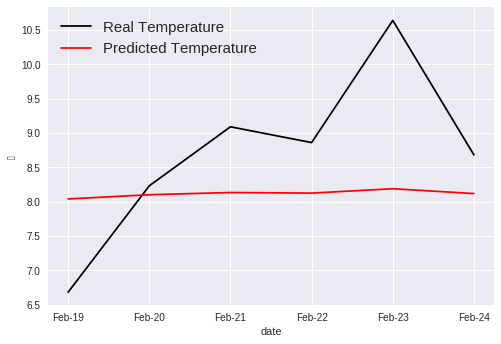

In [0]:
plt.plot(test_set, color = 'black', label = "Real Temperature") 
plt.plot(Tem_pre, color = 'red', label = "Predicted Temperature") 
plt.legend(loc = 2, prop = {'size' : 15})

df_test = df_test.reset_index() 
x = df_test.index


labels = df_test['date']
ax = plt.gca()
plt.xticks(x, labels)


    
plt.xlabel('date')
plt.ylabel('℃')
 
plt.show()    